In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_dir = '../../../Data/Weather'

In [15]:
!ls -lrt $data_dir/*.pickle

-rw-r--r--  1 yoavfreund  staff    1443406 Apr 24 11:05 ../../../Data/Weather/US_counts.pickle
-rw-r--r--  1 yoavfreund  staff    2816937 Apr 24 11:05 ../../../Data/Weather/stations_projections.pickle
-rw-r--r--  1 yoavfreund  staff   81681132 Apr 25 09:38 ../../../Data/Weather/STAT.pickle
-rw-r--r--  1 yoavfreund  staff  417856543 Apr 25 12:39 ../../../Data/Weather/SampleStations.pickle
-rw-r--r--  1 yoavfreund  staff     210335 Apr 27 18:50 ../../../Data/Weather/stable-clusters.pickle
-rw-r--r--  1 yoavfreund  staff  141198193 Apr 27 19:29 ../../../Data/Weather/MEAN_TAVG.pickle
-rw-r--r--  1 yoavfreund  staff  197032113 Apr 27 19:40 ../../../Data/Weather/MEAN_SNWD.pickle
-rw-r--r--  1 yoavfreund  staff  136871879 Apr 27 19:41 ../../../Data/Weather/MEAN_TRANGE.pickle


In [8]:
### Load pickle files
from glob import glob
import re

import pickle
D={}
for filename in glob(data_dir+'/MEAN_*.pickle'):
    print filename
    m=re.match(r'.*MEAN_(\w+).pickle',filename)
    name=m.group(1)
    D[name]=pickle.load(open(filename,'r'))

clusters=pickle.load(open(data_dir+'/stable-clusters.pickle'))

In [24]:
clusters.keys()

['3,4,0,4,3,1,2,3,4,4',
 '3,4,0,3,3,1,0,3,4,4',
 '2,0,3,4,4,4,2,0,0,3',
 '2,0,3,0,4,4,1,0,0,3',
 '0,3,4,0,0,0,1,4,2,0']

In [26]:
clusters['cold'] = set(clusters['3,4,0,4,3,1,2,3,4,4'] + clusters['3,4,0,3,3,1,0,3,4,4'])
clusters['medium'] = set(clusters['2,0,3,4,4,4,2,0,0,3'] + clusters['2,0,3,0,4,4,1,0,0,3'])
clusters['warm'] = set(clusters['0,3,4,0,0,0,1,4,2,0'])

In [27]:
for key in clusters.keys():
    print key, len(clusters[key])

3,4,0,3,3,1,0,3,4,4 584
medium 5241
0,3,4,0,0,0,1,4,2,0 3839
warm 3839
2,0,3,0,4,4,1,0,0,3 722
3,4,0,4,3,1,2,3,4,4 871
cold 1455
2,0,3,4,4,4,2,0,0,3 4519


In [62]:
D.keys()

['TAVG', 'TRANGE', 'SNWD']

In [63]:
cluster_names=['cold','medium','warm']
means={}
stds={}

for meas in D.keys():
    means[meas]={}
    stds[meas]={}

    block={c:[] for c in cluster_names}

    #collect 365D vectors for each Measurement/cluster
    for station,row in D[meas]:
        for clus in ['cold','medium','warm']:
            if station in clusters[clus]:
                block[clus].append(row)

    #stack Collections and compute mean and std
    B={}
    for clus in cluster_names:
        print meas,clus,len(block[clus])
        B[clus]=np.stack(block[clus])
        means[meas][clus]=np.nanmean(B[clus],axis=0)
        stds[meas][clus]=np.nanstd(B[clus],axis=0)

TAVG cold 1455
TAVG medium 5241
TAVG warm 3839
TRANGE cold 1455
TRANGE medium 5241
TRANGE warm 3839
SNWD cold 1455
SNWD medium 5241
SNWD warm 3839


In [71]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7),color='b'):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-'+color);
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

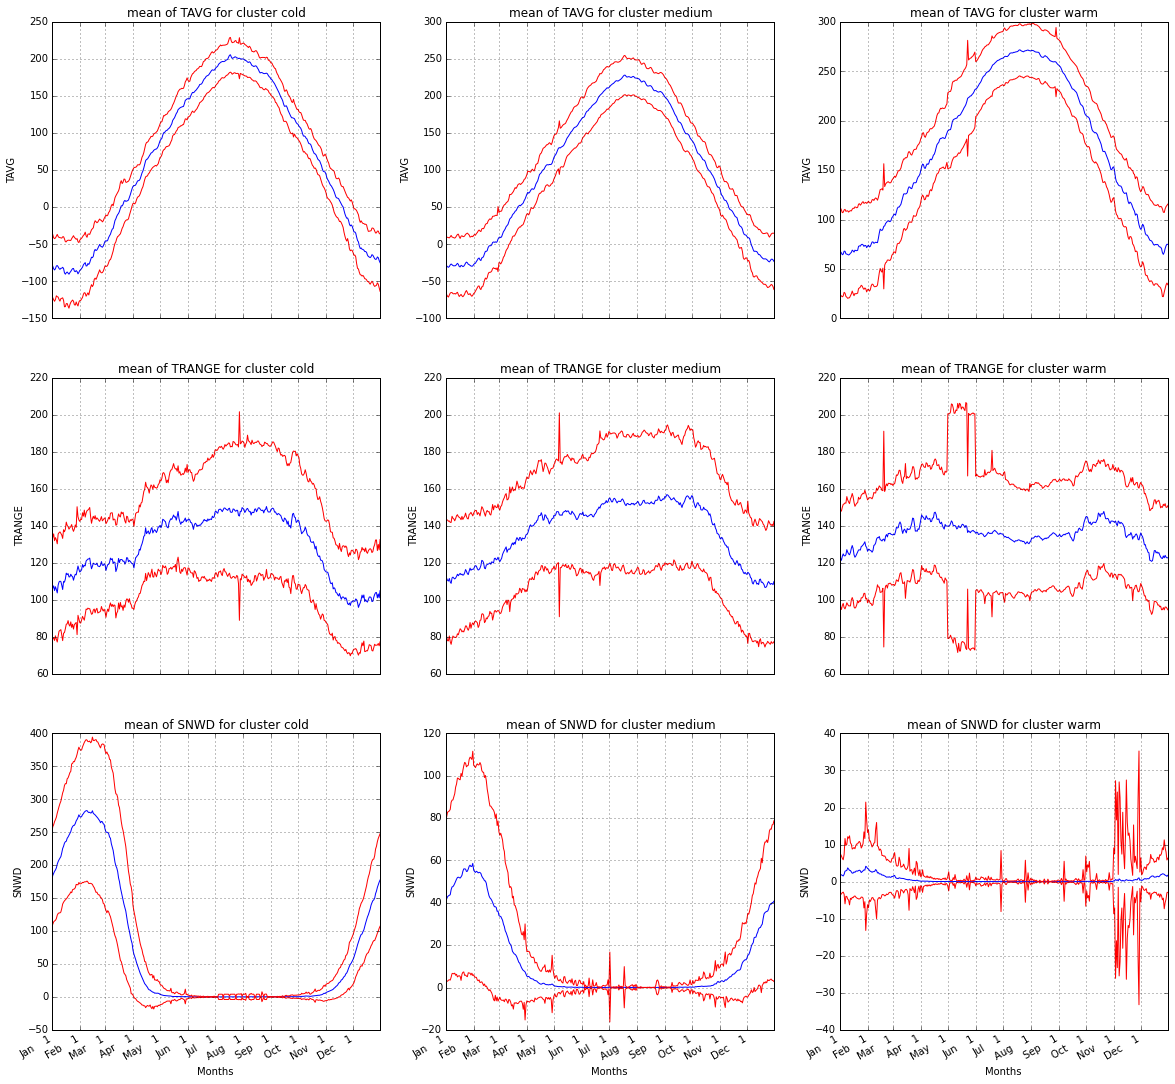

In [75]:
f=plt.figure(figsize=(20,20))
j=1
for meas in ['TAVG', 'TRANGE', 'SNWD']:
    for clus in cluster_names:
        M = means[meas][clus]
        S = stds[meas][clus]
        subplot(3,3,j)
        j+=1
        YearlyPlots(M, ttl='mean of ' + meas + ' for cluster '+clus, xl='Months', yl=meas,color='b')
        YearlyPlots(M-S, ttl='mean of ' + meas + ' for cluster '+clus, xl='Months', yl=meas,color='r')
        YearlyPlots(M+S, ttl='mean of ' + meas + ' for cluster '+clus, xl='Months', yl=meas,color='r')